原始数据形状: (256, 256, 30)
掩码形状: (256, 256, 30)
undersample-x-dtype: complex64
undersample-x-shape: (256, 256, 30)
undersample-mask-dtype: float64
undersample-mask-mask: (256, 256, 30)
欠采样后的图像形状: (256, 256, 30)
欠采样后的 k 空间形状: (256, 256, 30)


/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:71: UserWarning: Glyph 27424 (\N{CJK UNIFIED IDEOGRAP

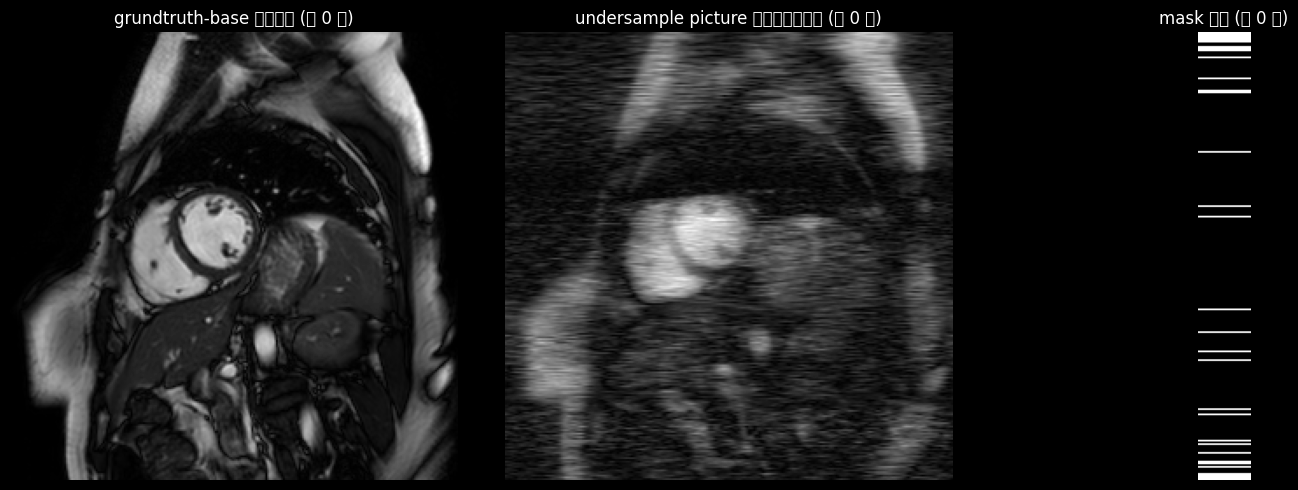

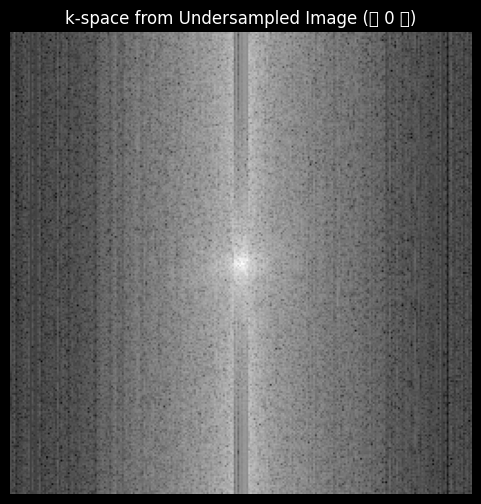

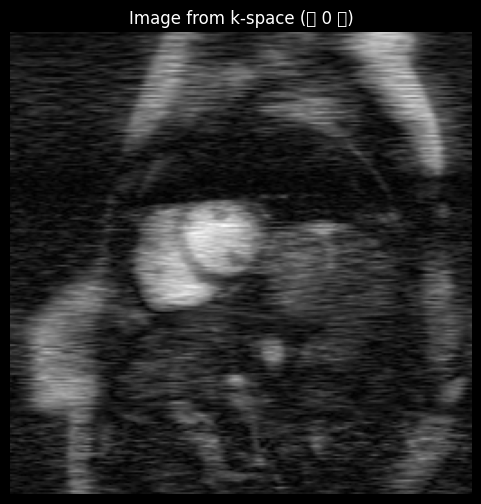

/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:121: UserWarning: Glyph 27424 (\N{CJK UNIFIED I

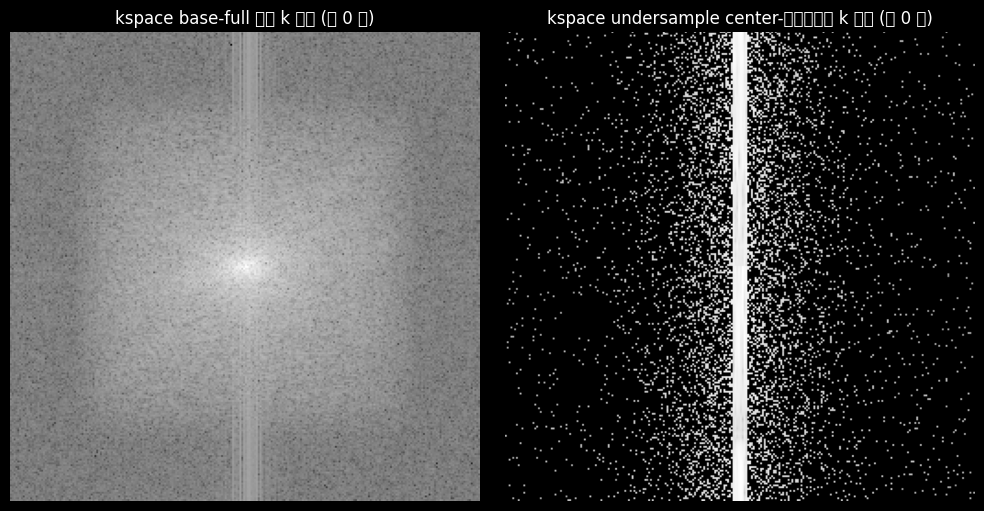

-----------------


/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 31354 (\N{CJK UNIFIED IDEOGRAPH-7A7A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 24103 (\N{CJK UNIFIED IDEOGRAPH-5E27}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_78429/1974571298.py:150: UserWarning: Glyph 27424 (\N{CJK UNIFIED I

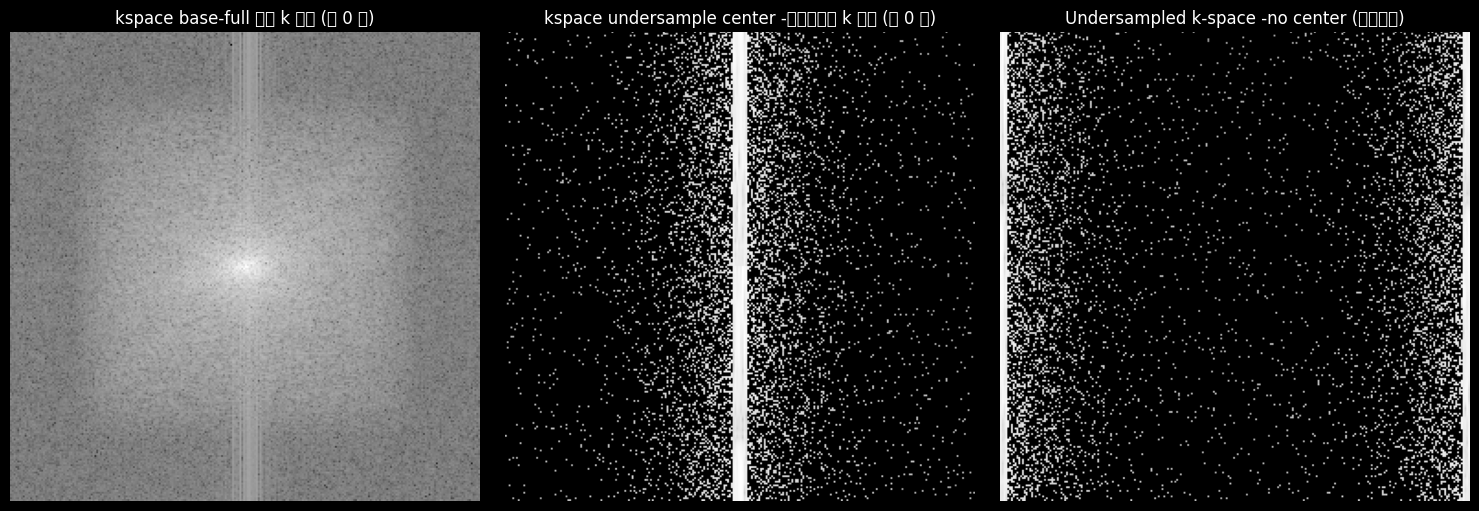

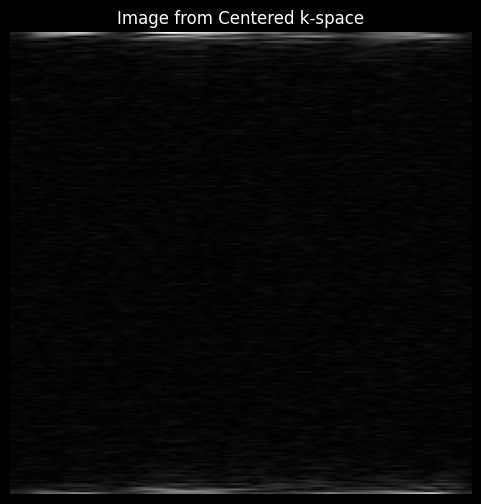

In [14]:
# %% [markdown]
# # 动态 MRI 欠采样与重建可视化
# 本代码展示欠采样之前的图像和 k 空间，以及欠采样之后的图像和 k 空间。

# %% [markdown]
# ## 1. 导入必要的库
# %%
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.io import loadmat
from os.path import join
from utils import compressed_sensing as cs
from cascadenet_pytorch.dnn_io import to_tensor_format, from_tensor_format

# %% [markdown]
# ## 2. 加载数据并生成掩码

# %%
# 加载数据
project_root = '.'
data = loadmat(join(project_root, './data/cardiac.mat'))['seq']
nx, ny, nt = data.shape
# 原始数据形状: (256, 256, 30)
print("原始数据形状:", data.shape)

# 生成掩码
acc = 8.0  # 欠采样率
mask = cs.cartesian_mask(data.shape, acc, sample_n=8)
# 掩码形状: (256, 256, 30)
print("掩码形状:", mask.shape)

# %% [markdown]
# ## 3. 欠采样

# %%
# 欠采样
im_und, k_und = cs.undersample(data, mask, centred=False, norm='ortho')
# 欠采样后的图像形状: (256, 256, 30)
# 欠采样后的 k 空间形状: (256, 256, 30)
print("欠采样后的图像形状:", im_und.shape)
print("欠采样后的 k 空间形状:", k_und.shape)

# %% [markdown]
# ## 4. 可视化结果

# %%
# 可视化原始图像和欠采样后的图像
plt.figure(figsize=(15, 5))

# 原始图像
plt.subplot(1, 3, 1)
plt.imshow(np.abs(data[:, :, 0]), cmap='gray')
plt.title("grundtruth-base 原始图像 (第 0 帧)")
plt.axis('off')

# 欠采样后的图像
plt.subplot(1, 3, 2)
plt.imshow(np.abs(im_und[:, :, 0]), cmap='gray')
plt.title("undersample picture 欠采样后的图像 (第 0 帧)")
plt.axis('off')

# 掩码
plt.subplot(1, 3, 3)
# plt.imshow(mask[:, :, 0], cmap='gray')  # 选择第 0 通道
plt.imshow(mask[0,:, :], cmap='gray')  # 选择第 0 通道
plt.title("mask 掩码 (第 0 帧)")
plt.axis('off')

plt.tight_layout()
plt.show()

# 假设 im_und 是欠采样后的图像，形状为 [256, 256, 30]
im_und_frame = im_und[:, :, 0]  # 选择第 0 帧
# 对欠采样后的图像进行傅里叶变换，转换到 k-space
k_und_from_im = np.fft.fft2(im_und_frame)  # 傅里叶变换
# 中心化
k_und_from_im_center = np.fft.fftshift(k_und_from_im)
# 计算 k-space 数据的幅值
k_und_magnitude = np.abs(k_und_from_im_center)  # 取模
# 对幅值取对数（增强显示效果）
k_und_log = np.log(k_und_magnitude + 1e-9)  # 避免对 0 取对数
# 显示 k-space 数据
plt.figure(figsize=(6, 6))
plt.imshow(k_und_log, cmap='gray')  # 使用灰度颜色映射
plt.title("k-space from Undersampled Image (第 0 帧)")
plt.axis('off')
plt.show()

# 假设 k_und_from_im 是 k-space 数据，形状为 [256, 256]
# 如果 k_und_from_im 是 3D 数据（例如 [256, 256, 30]），需要选择特定的帧
k_und_frame = k_und_from_im[:, :]  # 选择第 0 帧（如果是 3D 数据）
# 对 k-space 数据进行逆傅里叶变换，转换回图像域
im_from_k_und = np.fft.ifft2(k_und_frame)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模

# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from k-space (第 0 帧)")
plt.axis('off')
plt.show()


# 可视化原始 k 空间和欠采样后的 k 空间
plt.figure(figsize=(15, 5))
# 原始 k 空间
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(data[:, :, 0]))) + 1e-9), cmap='gray')
plt.title("kspace base-full 原始 k 空间 (第 0 帧)")
plt.axis('off')

# 欠采样后的 k 空间
plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(np.fft.fftshift(k_und[:, :, 0])) + 1e-9), cmap='gray')
plt.title("kspace undersample center-欠采样后的 k 空间 (第 0 帧)")
plt.axis('off')

plt.tight_layout()
plt.show()


print ('-----------------')
# 保存 k 空间
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(data[:, :, 0]))) + 1e-9), cmap='gray')
plt.title("kspace base-full 原始 k 空间 (第 0 帧)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(np.abs(np.fft.fftshift(k_und[:, :, 0])) + 1e-9), cmap='gray')
plt.title("kspace undersample center -欠采样后的 k 空间 (第 0 帧)")
plt.axis('off')

# 选择第 0 通道
k_und_frame = k_und[:, :, 0]  # 假设 k_und 的形状是 [256, 256, 2]
# 计算幅值
k_und_magnitude = np.abs(k_und_frame)  # 直接计算幅值，不进行中心化
# 对幅值取对数（增强显示效果）
k_und_log = np.log(k_und_magnitude + 1e-9)  # 避免对 0 取对数
# 显示未中心化的 k-space
plt.subplot(1, 3, 3)
plt.imshow(k_und_log, cmap='gray')  # 使用灰度颜色映射
plt.title("Undersampled k-space -no center (未中心化)")
plt.axis('off')

plt.tight_layout()
plt.show()

# 对 k-space 进行中心化
k_und_shifted = np.fft.fftshift(k_und_frame)
# 将中心化的 k-space 转换到图像域
im_from_k_und = np.fft.ifft2(k_und_shifted)  # 逆傅里叶变换
# 计算图像域数据的幅值
im_magnitude = np.abs(im_from_k_und)  # 取模

# 显示图像域的数据
plt.figure(figsize=(6, 6))
plt.imshow(im_magnitude, cmap='gray')  # 使用灰度颜色映射
plt.title("Image from Centered k-space")
plt.axis('off')
plt.show()

plt.close()

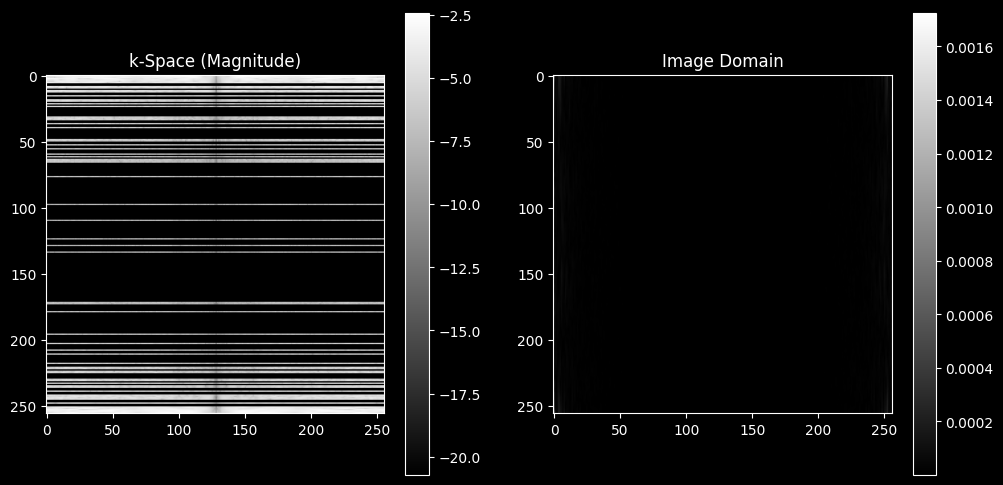

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 加载 kspace 数据
kspace_data = np.load('/nfs/zzy/code/Deep-MRI-Reconstruction/saved_data/last_epoch_k0_image.npy')

# 检查数据形状
# print("kspace_data shape:", kspace_data.shape) kspace_data shape: (1, 30, 256, 256, 2)

# 假设我们选择第一个批次、第一个时间点、实部和虚部
batch_idx = 0  # 选择第一个批次
time_idx = 0   # 选择第一个时间点

# 提取实部和虚部
kspace_real = kspace_data[batch_idx, time_idx, :, :, 0]  # 实部
kspace_imag = kspace_data[batch_idx, time_idx, :, :, 1]  # 虚部

# 合并实部和虚部为复数
kspace_complex = kspace_real + 1j * kspace_imag

# 显示 kspace 数据（通常显示其幅度）
plt.figure(figsize=(12, 6))

# 显示 kspace 的幅度
plt.subplot(1, 2, 1)
# plt.imshow(np.log(np.abs(kspace_complex) + 1e-9), cmap='gray')  # 使用 log 缩放以更好地显示
plt.imshow(np.log(np.abs(np.fft.fftshift(kspace_complex)) + 1e-9), cmap='gray')
plt.title('k-Space (Magnitude)')
plt.colorbar()

# 转换到图像域
image_data = np.fft.ifft2(kspace_complex)  # 2D 逆傅里叶变换
image_data = np.abs(image_data)  # 取幅度

# 显示图像域的数据
plt.subplot(1, 2, 2)
plt.imshow(image_data, cmap='gray')
plt.title('Image Domain')
plt.colorbar()

plt.show()

In [1]:
from __future__ import print_function, division

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy.io import loadmat
from torch.autograd import Variable

from utils import compressed_sensing as cs
from utils.metric import complex_psnr
from cascadenet_pytorch.model_pytorch import CRNN_MRI
from cascadenet_pytorch.dnn_io import to_tensor_format, from_tensor_format

# 设置 GPU
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
os.environ['CUDA_VISIBLE_DEVICES'] = '2'  # 指定使用 GPU 0
cuda = True if torch.cuda.is_available() else False
# Tensor = torch.cuda.FloatTensor if cuda else torch.Tensor
Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor  # 使用 CPU 或 GPU

In [8]:
def prep_input(im, acc=4.0):
    """准备输入数据：生成欠采样图像、k空间数据和掩码"""
    mask = cs.cartesian_mask(im.shape, acc, sample_n=8)
    im_und, k_und = cs.undersample(im, mask, centred=False, norm='ortho')
    im_gnd_l = torch.from_numpy(to_tensor_format(im)).float()
    im_und_l = torch.from_numpy(to_tensor_format(im_und)).float()
    k_und_l = torch.from_numpy(to_tensor_format(k_und)).float()
    mask_l = torch.from_numpy(to_tensor_format(mask, mask=True)).float()
    return im_und_l, k_und_l, mask_l, im_gnd_l

def iterate_minibatch(data, batch_size, shuffle=True):
    """生成小批量数据"""
    n = len(data)
    if shuffle:
        data = np.random.permutation(data)
    for i in range(0, n, batch_size):
        yield data[i:i + batch_size]
        
def load_model(model_path):
    """加载训练好的模型"""
    model = CRNN_MRI()
    if cuda:
        model = model.cuda()    # 将模型移动到 GPU
    model.load_state_dict(torch.load(model_path, map_location='cuda' if cuda else 'cpu'))
    model.float()  # 将模型参数转换为 float32
    model.eval()  # 设置为评估模式
    return model

# def inference(model, im, acc=4.0):
#     """推理函数：输入全采图像，输出重建图像"""
#     im_und, k_und, mask, im_gnd = prep_input(im, acc)
#     im_u = Variable(im_und.type(Tensor)).unsqueeze(0)  # 增加 batch 维度
#     k_u = Variable(k_und.type(Tensor)).unsqueeze(0)
#     mask = Variable(mask.type(Tensor)).unsqueeze(0)
    
#     with torch.no_grad():
#         pred = model(im_u, k_u, mask, test=True)
    
#     # 将输出转换为 numpy 格式
#     pred_np = from_tensor_format(pred.data.cpu().numpy())[0]
#     im_gnd_np = from_tensor_format(im_gnd.numpy())[0]
#     im_und_np = from_tensor_format(im_und.numpy())[0]
#     mask_np = from_tensor_format(mask.data.cpu().numpy(), mask=True)[0]
    
#     return im_gnd_np, im_und_np, pred_np, mask_np
# def inference(model, im, acc=4.0):
#     """推理函数：输入全采图像，输出重建图像"""
#     # inference-im-shape: (30, 256, 256)
#     print('inference-im-shape:',im.shape)
#     im_und, k_und, mask, im_gnd = prep_input(im, acc)
#     im_u = Variable(im_und.type(Tensor)).unsqueeze(0).half()  # 转换为 float16
#     k_u = Variable(k_und.type(Tensor)).unsqueeze(0).half()    # 转换为 float16
#     mask = Variable(mask.type(Tensor)).unsqueeze(0).half()    # 转换为 float16
    
#     with torch.no_grad():
#         pred = model(im_u, k_u, mask, test=True)
    
#     # 将输出转换为 numpy 格式
#     pred_np = from_tensor_format(pred.data.cpu().float().numpy())[0]  # 转换回 float32
#     im_gnd_np = from_tensor_format(im_gnd.numpy())[0]
#     im_und_np = from_tensor_format(im_und.numpy())[0]
#     mask_np = from_tensor_format(mask.data.cpu().float().numpy(), mask=True)[0]  # 转换回 float32
    
#     return im_gnd_np, im_und_np, pred_np, mask_np
def inference(model, test_data, batch_size=1, acc=4.0):
    """推理函数：输入测试数据，输出重建图像"""
    vis = []  # 用于保存可视化结果
    for im in iterate_minibatch(test_data, batch_size, shuffle=False):
        im_und, k_und, mask, im_gnd = prep_input(im, acc)
        # im_u = Variable(im_und.type(Tensor)).half()  # 转换为 float16
        # k_u = Variable(k_und.type(Tensor)).half()    # 转换为 float16
        # mask = Variable(mask.type(Tensor)).half()    # 转换为 float16
        # gnd = Variable(im_gnd.type(Tensor)).half()   # 转换为 float16
        im_u = Variable(im_und.type(Tensor))  # 保持为 float32
        k_u = Variable(k_und.type(Tensor))    # 保持为 float32
        mask = Variable(mask.type(Tensor))    # 保持为 float32
        gnd = Variable(im_gnd.type(Tensor))   # 保持为 float32
        if torch.cuda.is_available():
            im_u = im_u.cuda()
            k_u = k_u.cuda()
            mask = mask.cuda()
            gnd = gnd.cuda()
        # 打印输入数据的设备信息
        print('im_u device:', im_u.device)
        print('k_u device:', k_u.device)
        print('mask device:', mask.device)
        print('model device:', next(model.parameters()).device)
        with torch.no_grad():
            pred = model(im_u, k_u, mask, test=True)

        # 将结果保存到 vis 列表中
        # vis.append((from_tensor_format(im_gnd.numpy())[0],
        #             from_tensor_format(pred.data.cpu().float().numpy())[0],  # 转换回 float32
        #             from_tensor_format(im_und.numpy())[0],
        #             from_tensor_format(k_u.numpy())[0],
        #             from_tensor_format(mask.data.cpu().float().numpy(), mask=True)[0]))  # 转换回 float32
        print('gnd device:', gnd.device)
        print('pred device:', pred.device)
        print('im_u device:', im_u.device)
        print('k_u device:', k_u.device)
        print('mask device:', mask.device)
        # 将结果保存到 vis 列表中
        vis.append((
            from_tensor_format(gnd.cpu().numpy())[0],  # 将 gnd 移动到 CPU
            from_tensor_format(pred.data.cpu().float().numpy())[0],  # 将 pred 移动到 CPU
            from_tensor_format(im_u.cpu().numpy())[0],  # 将 im_u 移动到 CPU
            from_tensor_format(k_u.cpu().numpy())[0],  # 将 k_u 移动到 CPU
            from_tensor_format(mask.data.cpu().float().numpy(), mask=True)[0]  # 将 mask 移动到 CPU
        ))
        
        # 清空 GPU 缓存
        if cuda:
            torch.cuda.empty_cache()
    return vis


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def plot_results(im_gnd, im_und, k_und, pred, mask):
    print('plot_results-im_gnd:', im_gnd.shape)
    print('plot_results-im_und:', im_und.shape)
    print('plot_results-k_und:', k_und.shape)
    print('plot_results-pred:', pred.shape)
    print('plot_results-mask:', mask.shape)
    
    """绘制全采图像、欠采图像、重建图像、掩码、欠采k-space及其图像域图像"""
    plt.figure(figsize=(16, 12))
    
    # 选择时间维度中的第 0 帧（如果存在）
    frame_idx = 0  # 可以根据需要修改为其他帧的索引
    
    # 处理全采图像
    if len(im_gnd.shape) == 3:  # 如果有时间维度
        im_gnd_frame = im_gnd[frame_idx]
    else:
        im_gnd_frame = im_gnd
    plt.subplot(2, 3, 1)
    plt.imshow(abs(im_gnd_frame), cmap='gray')
    plt.title('Full Sampled Image')
    plt.axis('off')
    
    # 处理欠采图像
    if len(im_und.shape) == 3:  # 如果有时间维度
        im_und_frame = im_und[frame_idx]
    else:
        im_und_frame = im_und
    plt.subplot(2, 3, 2)
    plt.imshow(abs(im_und_frame), cmap='gray')
    plt.title('Undersampled Image')
    plt.axis('off')
    
    # 处理重建图像
    if len(pred.shape) == 3:  # 如果有时间维度
        pred_frame = pred[frame_idx]
    else:
        pred_frame = pred
    plt.subplot(2, 3, 3)
    plt.imshow(abs(pred_frame), cmap='gray')
    plt.title('Reconstructed Image')
    plt.axis('off')
    
    # 处理掩码
    if len(mask.shape) == 3:  # 如果有时间维度
        mask_frame = mask[frame_idx]
    else:
        mask_frame = mask
    plt.subplot(2, 3, 4)
    plt.imshow(np.fft.fftshift(mask_frame), cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    
    # 处理欠采k-space
    if len(k_und.shape) == 3:  # 如果有时间维度
        k_und_frame = k_und[frame_idx]
    else:
        k_und_frame = k_und
    plt.subplot(2, 3, 5)
    plt.imshow(np.log(1 + np.abs(k_und_frame)), cmap='gray')
    plt.title('Undersampled k-space')
    plt.axis('off')
    
    # 将k-space转换到图像域并显示
    im_from_k_und = np.fft.ifft2(k_und_frame)
    plt.subplot(2, 3, 6)
    plt.imshow(abs(im_from_k_und), cmap='gray')
    plt.title('Image from Undersampled k-space')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [4]:
def create_dummy_data():
    """Create small cardiac data based on patches for demo.

    Note that in practice, at test time the method will need to be applied to
    the whole volume. In addition, one would need more data to prevent
    overfitting.

    """
    project_root = '.'
    data = loadmat(join(project_root, './data/cardiac.mat'))['seq']
    nx, ny, nt = data.shape  # 原始数据形状: [30, 256, 256]
    
    # 转置数据，将时间维度放在最前面
    data_t = np.transpose(data, (2, 0, 1))  # 转置后形状: [256, 256, 30]
    
    # 生成训练集、验证集和测试集
    # 保持后两个维度为 [256, 256]，仅从时间维度切片
    train = np.array([data_t for _ in range(20)])  # 训练集: [20, 256, 256, 30]
    validate = np.array([data_t for _ in range(2)])  # 验证集: [2, 256, 256, 30]
    test = np.array([data_t for _ in range(2)])  # 测试集: [2, 256, 256, 30]

    return train, validate, test

In [10]:
# 加载测试数据
data = loadmat(join('.', './data/cardiac.mat'))['seq']
data_t = np.transpose(data, (2, 0, 1))  # 转置数据，将时间维度放在最前面
test_data = np.array([data_t for _ in range(2)])  # 测试集: [2, 256, 256, 30]
# train, validate, test_data = create_dummy_data()
print('test_data-shape:',test_data.shape)

# 加载模型
# model_path = '/nfs/zzy/code/Deep-MRI-Reconstruction/models/crnn_mri_0109/crnn_mri_0109_epoch_499.npz'
# model_path = '/nfs/zzy/code/Deep-MRI-Reconstruction/models/crnn_mri_0111/crnn_mri_0111_epoch_199.npz'
model_path = '/nfs/zzy/code/Deep-MRI-Reconstruction/models/crnn_mri_0110/crnn_mri_0110_epoch_49.npz'
model = load_model(model_path)

# 推理并显示结果
vis = inference(model, test_data, batch_size=1, acc=4.0)
for im_gnd, pred, im_und,k_und, mask in vis:
    print('im_gnd shape:', im_gnd.shape)
    print('im_und shape:', im_und.shape)
    print('k_und shape:', k_und.shape)
    print('pred shape:', pred.shape)
    print('mask shape:', mask.shape)
    plot_results(im_gnd, im_und, k_und,pred, mask)

test_data-shape: (2, 30, 256, 256)
undersample-x-dtype: complex64
undersample-mask-dtype: float64


/tmp/ipykernel_77840/1317541812.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location='cuda' if cuda else 'cpu'))


to_tensor_format-x-shape-1: (1, 256, 256, 30)
to_tensor_format-x-dtype-1: complex64
to_tensor_format-x-shape-2: (1, 2, 256, 256, 30)
to_tensor_format-x-dtype-2: float32
to_tensor_format-x-shape-1: (1, 256, 256, 30)
to_tensor_format-x-dtype-1: complex128
to_tensor_format-x-shape-2: (1, 2, 256, 256, 30)
to_tensor_format-x-dtype-2: float64
to_tensor_format-x-shape-1: (1, 256, 256, 30)
to_tensor_format-x-dtype-1: complex128
to_tensor_format-x-shape-2: (1, 2, 256, 256, 30)
to_tensor_format-x-dtype-2: float64
to_tensor_format-x-shape-1: (1, 256, 256, 30)
to_tensor_format-x-dtype-1: complex128
to_tensor_format-x-shape-2: (1, 2, 256, 256, 30)
to_tensor_format-x-dtype-2: float64
im_u device: cuda:0
k_u device: cuda:0
mask device: cuda:0
model device: cuda:0
CRNN_MRI-x device: cuda:0
CRNN_MRI-k device: cuda:0
CRNN_MRI-m device: cuda:0


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.io import loadmat
# from os.path import join
# import torch
# from utils import compressed_sensing as cs
# from utils.dnn_io import to_tensor_format, from_tensor_format

def prep_input(im, acc=4.0):
    """准备输入数据：生成欠采样图像、k空间数据和掩码"""
    mask = cs.cartesian_mask(im.shape, acc, sample_n=8)
    # im_und, k_und = cs.undersample(im, mask, centred=False, norm='ortho')
    print('prep_input-im:',im.shape)
    print('prep_input-mask:',mask.shape)
    im_und, k_und = cs.undersample(im, mask, centred=True, norm='ortho')
    im_gnd_l = torch.from_numpy(to_tensor_format(im)).float()
    im_und_l = torch.from_numpy(to_tensor_format(im_und)).float()
    k_und_l = torch.from_numpy(to_tensor_format(k_und)).float()
    mask_l = torch.from_numpy(to_tensor_format(mask, mask=True)).float()
    return im_und_l, k_und_l, mask_l, im_gnd_l

def plot_results(im_gnd, im_und, k_und, mask):
    """显示全采图像、欠采图像、欠采k-space、k-space转换到图像域、掩码"""
    print('im_gnd shape:', im_gnd.shape)
    print('im_und shape:', im_und.shape)
    print('k_und shape:', k_und.shape)
    print('mask shape:', mask.shape)
    
    # 将 Tensor 转换为 NumPy 数组
    im_gnd = im_gnd.numpy()
    im_und = im_und.numpy()
    k_und = k_und.numpy()
    mask = mask.numpy()

    # 选择时间维度中的第 0 帧（如果存在）
    frame_idx = 0  # 可以根据需要修改为其他帧的索引
    channel_idx = 0  # 选择第 0 通道

    # 处理全采图像
    if len(im_gnd.shape) == 4:  # 如果有时间维度和通道维度
        im_gnd_frame = im_gnd[frame_idx, channel_idx]  # 选择第 0 帧和第 0 通道
    elif len(im_gnd.shape) == 3:  # 如果只有时间维度
        im_gnd_frame = im_gnd[frame_idx]
    else:
        im_gnd_frame = im_gnd
    plt.figure(figsize=(16, 12))
    plt.subplot(2, 3, 1)
    plt.imshow(abs(im_gnd_frame), cmap='gray')  # 取模显示
    plt.title('Full Sampled Image')
    plt.axis('off')

    # 处理欠采图像
    if len(im_und.shape) == 4:  # 如果有时间维度和通道维度
        im_und_frame = im_und[frame_idx, channel_idx]  # 选择第 0 帧和第 0 通道
    elif len(im_und.shape) == 3:  # 如果只有时间维度
        im_und_frame = im_und[frame_idx]
    else:
        im_und_frame = im_und
    plt.subplot(2, 3, 2)
    plt.imshow(abs(im_und_frame), cmap='gray')  # 取模显示
    plt.title('Undersampled Image')
    plt.axis('off')

    # 处理欠采k-space
    if len(k_und.shape) == 4:  # 如果有时间维度和通道维度
        k_und_frame = k_und[frame_idx, channel_idx]  # 选择第 0 帧和第 0 通道
    elif len(k_und.shape) == 3:  # 如果只有时间维度
        k_und_frame = k_und[frame_idx]
    else:
        k_und_frame = k_und
    plt.subplot(2, 3, 3)
    plt.imshow(np.log(1 + np.abs(k_und_frame)), cmap='gray')  # 取模并增强显示
    plt.title('Undersampled k-space')
    plt.axis('off')

    # 将k-space转换到图像域并显示
    im_from_k_und = np.fft.ifft2(k_und_frame)
    plt.subplot(2, 3, 4)
    plt.imshow(abs(im_from_k_und), cmap='gray')  # 取模显示
    plt.title('Image from Undersampled k-space')
    plt.axis('off')

    # 处理掩码
    if len(mask.shape) == 4:  # 如果有时间维度和通道维度
        mask_frame = mask[frame_idx, channel_idx]  # 选择第 0 帧和第 0 通道
    elif len(mask.shape) == 3:  # 如果只有时间维度
        mask_frame = mask[frame_idx]
    else:
        mask_frame = mask
    plt.subplot(2, 3, 5)
    plt.imshow(np.fft.fftshift(mask_frame), cmap='gray')  # 中心化显示
    plt.title('Mask')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
# 加载测试数据
data = loadmat(join('.', './data/cardiac.mat'))['seq']
data_t = np.transpose(data, (2, 0, 1))  # 转置数据，将时间维度放在最前面
test_data = np.array([data_t for _ in range(2)])  # 测试集: [2, 30, 256, 256]
print('test_data shape:', test_data.shape)

# 选择第一个样本
im = test_data[0]  # 形状: [30, 256, 256]

# 生成欠采样数据
acc = 4.0  # 欠采样率
im_und, k_und, mask, im_gnd = prep_input(im, acc)

# 显示结果
plot_results(im_gnd, im_und, k_und, mask)

test_data shape: (2, 30, 256, 256)
undersample-x-dtype: complex64
undersample-mask-dtype: float64


ValueError: Shape and axes have different lengths.

In [1]:
import torch
# True --nccl是可用的
print(torch.distributed.is_nccl_available())

True
